## Laboratorijska vježba 4. - Akvizicija podataka

#### Ime i prezime studenta, broj indeksa: Haris Masovic, 1689/17993

#### Datum izrade izvještaja: 04.04.2021

### Zadatak 1. - Prikupljanje podataka sa socijalnih mreža

In [31]:
import sys

!{sys.executable} -m pip install tweepy requests matplotlib 

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


#### Zadatak: Instalirati tweepy biblioteku i kreirati API objekat.

In [204]:
import tweepy

# creds
consumer_key = "CXiGZ15NTSQUmF7i32GZpng2r"
consumer_secret = "X22SwFmp9yBi3v1LkvW6xkBYhQq2LNa7hcrKYHcU0HyfDOKWCJ"
access_token = "1126772076562411521-na4TqG5a3T3mDIJ2cJKRB2g9Cjuszq"
access_token_secret = "DNuQhojAP40YWKXVRJCZ9Pf2MFJck91AF9rW4mCup7TpT"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

#### Zadatak: Dobaviti tweet koji se nalazi na sljedećem linku. Ispisati ime korisnika koji je objavio tweet i tekst tweeta.

In [205]:
status_id = "1362663250672963584"

status = api.get_status(status_id)

print(*['Ime korisnika: ', status._json['user']['name']])
print('')
print(*['Objavljeni tweet:', status.text])
print('')

status_extended = api.get_status(status_id, tweet_mode = 'extended')

print(*['Extended verzija tweeta:', status_extended._json['full_text']])

Ime korisnika:  Nedad Memić

Objavljeni tweet: "In Front of the Family House": the young man with bicycle visiting his father's family. Sarajevo in 1939. Photo by… https://t.co/zFQjLYWRXd

Extended verzija tweeta: "In Front of the Family House": the young man with bicycle visiting his father's family. Sarajevo in 1939. Photo by Alija M. Akšamija, a pioneer of Bosnian photography 

Happy Friday! 💕 https://t.co/trzchzy3VD


- Razlika izmedju dva prikaza jeste da u extended verziji se nalazi citav tweet, dok je u prvoj verziji skracen za odredjeni dio i skraceni dio je zamijenjen sa tri tacke.

#### Zadatak: Provjeriti da li dobavljeni tweet sadrži sliku. Ukoliko je sadrži, prikazati link slike i samu sliku.

Tweet sadrzi sliku, a link slike je: http://pbs.twimg.com/media/Eukm09dWYAECVt8.jpg
Slika je prikazana ispod:


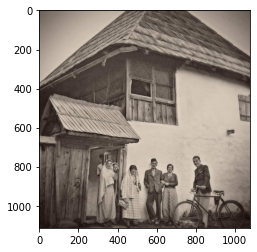

In [206]:
from PIL import Image

import requests 
import matplotlib.pyplot as plt
import requests
import io 


# provjera da li tweet sadrzi sliku 

media = status_extended.entities['media']

if len(media) > 0:
    tweet_url_picture = media[0]['media_url']
    
    if len(tweet_url_picture) > 0:
        print(*['Tweet sadrzi sliku, a link slike je:', tweet_url_picture])
        print('Slika je prikazana ispod:')
        
        res = requests.get(tweet_url_picture).content
        image = Image.open(io.BytesIO(res))
        plt.imshow(image)
        plt.show()



#### Zadatak: Ispisati najnovijih 10 tweetova za pojam 'bosnia'.

In [207]:
list_of_tweets = api.search(q = 'bosnia', count = 10)

print('Prikaz 10 tweetova za search bosnia:')
print('')

for i in range(0, len(list_of_tweets)):
    print(*[i + 1, '-', list_of_tweets[i].text])
    print('')

Prikaz 10 tweetova za search bosnia:

1 - RT @CotesDeFerrr: My grandfather , Sarajevo Bosnia and Herzegovina 🇧🇦, 1925 https://t.co/GW0pjtYDzK

2 - RT @CotesDeFerrr: My grandfather , Sarajevo Bosnia and Herzegovina 🇧🇦, 1925 https://t.co/GW0pjtYDzK

3 - RT @CotesDeFerrr: My grandfather , Sarajevo Bosnia and Herzegovina 🇧🇦, 1925 https://t.co/GW0pjtYDzK

4 - RT @CotesDeFerrr: My grandfather , Sarajevo Bosnia and Herzegovina 🇧🇦, 1925 https://t.co/GW0pjtYDzK

5 - RT @CotesDeFerrr: My grandfather , Sarajevo Bosnia and Herzegovina 🇧🇦, 1925 https://t.co/GW0pjtYDzK

6 - RT @CotesDeFerrr: My grandfather , Sarajevo Bosnia and Herzegovina 🇧🇦, 1925 https://t.co/GW0pjtYDzK

7 - RT @CotesDeFerrr: My grandfather , Sarajevo Bosnia and Herzegovina 🇧🇦, 1925 https://t.co/GW0pjtYDzK

8 - RT @CotesDeFerrr: My grandfather , Sarajevo Bosnia and Herzegovina 🇧🇦, 1925 https://t.co/GW0pjtYDzK

9 - RT @CotesDeFerrr: My grandfather , Sarajevo Bosnia and Herzegovina 🇧🇦, 1925 https://t.co/GW0pjtYDzK

10 - RT @CotesDeF

#### Zadatak: Ispisati najnovijih 5 tweetova koji sadrže tag `sarajevo`, koje sadrže oznaku korisnika `dino_merlin` i koje spominju riječ `summer` sa pozitivnim raspoloženjem.

In [208]:
def log_out_tweets(tweets):
    for i in range(0, len(tweets)):
        print(*[i + 1, '-', tweets[i].text])
        print('')
        

list_sarajevo_tweets = api.search(q = '#sarajevo', count = 5)
list_dino_merlin_tweets = api.search(q = '@dino_merlin', count = 5)
list_summer_tweets = api.search(q = 'summer :)', count = 5)

print('Prikaz 5 tweetova za tag #sarajevo:')
print('')
log_out_tweets(list_sarajevo_tweets)

print('Prikaz 5 tweetova za @dino_merlin:')
print('')
log_out_tweets(list_dino_merlin_tweets)

print('Prikaz 5 tweetova za \"summer :)\":')
print('')
log_out_tweets(list_summer_tweets)

Prikaz 5 tweetova za tag #sarajevo:

1 - RT @BosnianHistory: On this day, 1992, the Siege of #Sarajevo began. It was the longest siege of a capital city in the modern era. Sniper a…

2 - RT @vedrandzihic: When on April 5th the siege of Sarajevo started many in my home town Prijedor still couldn‘t believe &amp; see what is coming…

3 - RT @doamuslims: The siege of #Sarajevo began on this day in 1992. Sarajevo was subjected to daily shelling and sniper attacks from Serb nat…

4 - RT @iehutin: El 5 de abril de 1992, hace 29 años, inició el sitio de #Sarajevo. Fueron 1425 de ataques por parte del ejército serbobosnio d…

5 - RT @BosnianHistory: Pictorial map of the siege of #Sarajevo. Shows the siege forces which encircled the city and surrounding hills with wea…

Prikaz 5 tweetova za @dino_merlin:

1 - Öyle bir sesi olan adam ki; diledikçe güvercinleri yemlemiş, kedileri okşamış, denizleri kucaklamış oluyorsunuz.
Öy… https://t.co/jZWTnvVXma

2 - @dino_merlin 
Good job, great song❣️🎶🎵 

Th

### Zadatak 2. - Prikupljanje podataka sa foruma

In [209]:
import sys

!{sys.executable} -m pip install stackapi

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


#### Zadatak: Dobaviti najnovijih 10 komentara koji su objavljeni na stranici StackOverflow. Prikazati sadržaj samo komentara koje je postavio neki registrovani korisnik.

In [210]:
from stackapi import StackAPI

USER_TYPE_REGISTERED = 'registered'


SITE = StackAPI('stackoverflow')
SITE.page_size = 10
SITE.max_pages = 1

comments = SITE.fetch('comments', filter = 'withbody')

for comment in comments['items']:
    owner = comment['owner']
    
    if owner['user_type'] == USER_TYPE_REGISTERED:
        print(comment['body'])
        print('')


For TSP look at the great book &quot;Julia Programming for Operations Research, 2nd Edition&quot;. Heuristics work here well - try  the package TravellingSalesmenHeuristics.jl

&quot;If there were just the variables being defined, I guess I could just import the file and it would run as python&quot; um, no?

Thanks for the update.  Whats &quot;RI&quot;?  Do I need jasson?  Do I also need     &lt;groupId&gt;org.glassfish&lt;/groupId&gt;     &lt;artifactId&gt;javax.json&lt;/artifactId&gt;?

The concepts behind a genetic algorithm are pretty simple. The rest is just implementation details, and problem-specific details. So the question needs to explain what you already understand, and what you need to know.

<b>WARNING</b>: Writing an access control layer is not easy and there are many opportunities to get it severely wrong. Any modern <a href="https://www.cloudways.com/blog/best-php-frameworks/" rel="nofollow noreferrer">development framework</a> like <a href="http://laravel.com/" rel="no

#### Zadatak: Dobaviti 5 najnovijih pitanja postavljenih za tagove 'scraping' i 'python'. Prikazati ime svakog pitanja, kao i broj pregleda i odgovora na pitanje.

In [211]:
SITE = StackAPI('stackoverflow')
SITE.page_size = 5
SITE.max_pages = 1

questions = SITE.fetch('questions', tagged = 'scraping;python')

for question in questions['items']:
    title = question['title']
    view_count = question['view_count']
    answer_count = question['answer_count']
    
    print(*['Ime pitanja:', title, '\nBroj pregleda:', view_count, '\nBroj odgovora:', answer_count])
    print('')
    

Ime pitanja: How to properly add proxy rotator to script? 
Broj pregleda: 8 
Broj odgovora: 0

Ime pitanja: No data appearing when I attempt to scrape data from a table 
Broj pregleda: 29 
Broj odgovora: 2

Ime pitanja: Data getting scraped and printed is only the first entry of each page but I need all the data 
Broj pregleda: 29 
Broj odgovora: 1

Ime pitanja: How to extract specific data from stcipt var? 
Broj pregleda: 33 
Broj odgovora: 1

Ime pitanja: Pandas Dataframe doesnt update when running Multiprocessing code 
Broj pregleda: 34 
Broj odgovora: 1



#### Zadatak: Prikazati nazive za 5 najnovijih postova koji imaju naziv sličan nazivu `Data Analysis in Python`, samo ukoliko imaju odgovor i ukoliko korisnik ima reputaciju veću od 1.

In [212]:
SITE = StackAPI('stackoverflow')
SITE.page_size = 5
SITE.max_pages = 1

q_similar_titles = 'Data Analysis in Python'

similar_items = SITE.fetch('similar', title = q_similar_titles)

for item in similar_items['items']:
    owner = item['owner']
    
    if item['is_answered'] and owner['reputation'] > 1:
        print(item['title'])
        print('')

Pandas get minimum value of row and store corresponding index



### Zadatak 3. - Prikupljanje podataka sa HTML stranica

In [213]:
import sys

!{sys.executable} -m pip install feedparser

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [214]:
import feedparser
import re

def remove_HTML_tags(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

#### Zadatak: Ispisati naziv novinskog članka koji se nalazi na sljedećem linku.

In [215]:
url_link = "https://www.oslobodjenje.ba/vijesti/bih/sladic-najavio-dolazak-neobicne-vremenske-pojave-nebo-ce-biti-zamuceno-crvenkaste-i-narandzaste-boje-temperature-do-21-c-632133"

content = feedparser.parse(url_link)

html = content['feed']['summary']

header = html[html.find("<h1 class=\"item__title\">") : html.find("</h1>")]

print(remove_HTML_tags(header))


Sladić najavio dolazak neobične vremenske pojave: Nebo će biti zamućeno, crvenkaste i narandžaste boje, temperature do 21 °C


#### Zadatak: Ispisati sadržaj članka iz prethodno dobavljene stranice.

In [216]:
url_link = "https://www.oslobodjenje.ba/vijesti/bih/sladic-najavio-dolazak-neobicne-vremenske-pojave-nebo-ce-biti-zamuceno-crvenkaste-i-narandzaste-boje-temperature-do-21-c-632133"

content = feedparser.parse(url_link)

html = content['feed']['summary']

body = html[html.find("<div class=\"item__subtitle\">") : html.find("<div class=\"item__related\">")]

print(remove_HTML_tags(body))


Od sredine iduće sedmice i prema našim područjima će pristizati saharski pijesak koji će se gurati sa sjevera prema jugu, a iz dana u dan sve će više biti primjetniji i nad bosanskohercegovačkim nebomPočetkom iduće sedmice sa prednje strane ciklone koja će se premještati preko Pirinejskog poluostrva prema Magrebu će u izraženom južnom i jugozapadnom visinskom strujanju povlačiti velike količine saharskog pijeska prema centralnoj Europi, naročito na područje Francuske, Njemačke, Švicarske i dalje ka Skandinaviji, zbog čega će ova područja imati prilično zamućeno nebo, često u nijansama narandžaste i crvenkaste boje, prognozirao je meteorolog Nedim Sladić.
-Posljedično bismo mogli narednih dana ponovo čitati tekstove i gledati slike lokalnih medija kako je nad Alpama saharski pijesak doslovno stvorio prizore pustinjskog neba usljed zasićenja aerosolom, a snijeg bi opet poprimio crvenkastu boju kao početkom februara 2021. godine, kazao je on.
S druge strane, stabilne su vremenske prilike 

#### Zadatak: Zadatak: Ispisati naziv i sadržaj za 5 najnovijih članaka objavljenih na ovom RSS feedu

In [217]:
rss_feed = "https://www.aljazeera.com/xml/rss/all.xml"

content = feedparser.parse(rss_feed)

entries = content['entries']

for i in range(0, min(5, len(entries))):
    entry = entries[i]
    print(*[i + 1, '-', 'Naziv:', entry['title'], '\nSadrzaj:', entry['summary']])

1 - Naziv: Race to the bottom: Yellen makes case for global minimum tax rate 
Sadrzaj: The US Treasury secretary says a global minimum corporate tax rate will ensure firms pay up, but critics voice concerns.
2 - Naziv: Putin signs law allowing him two more terms as Russia’s leader 
Sadrzaj: The legislation allows the 68-year-old Russian president the possibility to stay in power until 2036.
3 - Naziv: Jordan’s Prince Hamzah signs letter declaring loyalty to king 
Sadrzaj: Palace says Hamzah signed letter affirming commitment to King Abdullah II, in sign that rift in royal family is easing.
4 - Naziv: US: Iran talks unlikely to lead to an ‘immediate breakthrough’ 
Sadrzaj: The US and Iran are planning to talk Tuesday in what is likely to be a long, difficult process to revive nuclear deal.
5 - Naziv: Lopez Obrador shifts gears, now says he won’t get COVID-19 jab 
Sadrzaj: The Mexican president says blood tests show he has antibodies in his system from the time he contracted the virus.


### Zadatak 4. - Prikupljanje podataka iz log file-ova

#### Zadatak: Zapisati sve informacije iz log file-a u listu, a zatim prikazati broj elemenata u listi. Lista obavezno treba imati imenovane atribute.

In [218]:
log_file = open("example_log_file.log", "r")

logs = []

with log_file as file:
    for line in file:
        logs.append({"Date" : line[0:5], "Timestamp" : line[6:14], "Severity" : line[15:22], "Message" : line[23:]})

print(*['Broj logova:' , len(logs)])

Broj logova: 52


#### Zadatak: Ispisati sadržaj za sve logove sa oznakom INFO koji su se desili između `08:51:02` i `08:51:04`. Iz sadržaja izbrisati tačke.

In [219]:
INFO_LOG_CONSTANT = "INFO"

for log in logs:
    time_values = log['Timestamp'].split(":")
    
    type_log = log['Severity']
    type_log_without_spaces = type_log.replace(" ","")
    
    if int(time_values[0]) == 8 and int(time_values[1]) == 51 and int(time_values[2]) >= 2 and int(time_values[2]) <= 4:
        if type_log_without_spaces == INFO_LOG_CONSTANT:
            print(log['Message'])

..reg_process: registering process with the system

..reg_process: attempt OS/390 registration

..reg_process: return from registration rc=0



#### Zadatak: Odrediti koja vrsta flaga se najčešće pojavljuje u zapisima, a zatim ispisati sve različite datume (bez ponavljanja) za koje postoje takvi unosi, kao i ime flaga koji se najčešće pojavljuje.

In [220]:
def get_most_frequent_flag(logs):
    all_type_data = []
    
    for log in logs:
        type_of_log = log['Severity']
        
        should_create_counter = True
        
        for current_unique_log in all_type_data:
            if current_unique_log['severity'] == type_of_log:
                should_create_counter = False
                current_unique_log['count'] = current_unique_log['count'] + 1
                break
                
        if should_create_counter:
            all_type_data.append({ "severity": type_of_log, "count": 1 })
    
    max_counter = 0
    severity_max = ""
    
    for entry in all_type_data:
        entry_count = entry['count']
        
        if entry_count > max_counter:
            max_counter = entry_count
            severity_max = entry['severity']
    
    return severity_max

def get_all_unique_dates_for_flag(logs, flag):
    all_unique_flag_dates = []
    
    for log in logs:
        date = log['Date']
        type_log = log['Severity']
        
        if type_log == flag and date not in all_unique_flag_dates:
            all_unique_flag_dates.append(date)
            
    return all_unique_flag_dates
            

most_frequent_flag = get_most_frequent_flag(logs)
    
print(*['Najcesca vrsta flaga:', most_frequent_flag])
print('')
print(*['Datumi:', get_all_unique_dates_for_flag(logs, most_frequent_flag)])

Najcesca vrsta flaga: INFO   

Datumi: ['03/22']
